# 2.1.4 Data Sources and Formats

Once you’ve found a dataset for your research question there are many formats it could be in - tabular data, databases, documents,
images or many more. In this section we give an overview of common data
types and how they can be loaded into Python.

Several of the file/data formats here are also covered in our [Research
Software Engineering
course](https://alan-turing-institute.github.io/rsd-engineeringcourse/).
Here we show how to load data with Pandas, and also introduce some new
data types.

## Tabular Data Files

### Comma-separated values files (CSVs)

Tabular data files, and particularly comma-separated values (CSV) files,
are likely to be the data format you encounter most often. These specify
a single table of rows and columns in the following format:

    "Subject","Teacher","Day of Week","Time Start","Time End"
    "Maths","Mr F","Monday",1000,1200
    "English","Ms P","Tuesday",1100,1300
    "Physics","Mrs A","Thursday",1400,1600
    "French","Mr F","Friday",1000,1300

The first line (usually) specifies the table column names, with each
name separated by a comma. The subsequent lines specify the values of
those columns for each row in our data, with each column value separated
by a comma.

As an example, we will use a dataset downloaded from The World Bank,
giving the percentage of people living in urban environments by country
worldwide since 1960. You can find the original source data
[here](https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS?view=chart).

To load a CSV file to a Pandas data frame you can use the Pandas
[`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
function:

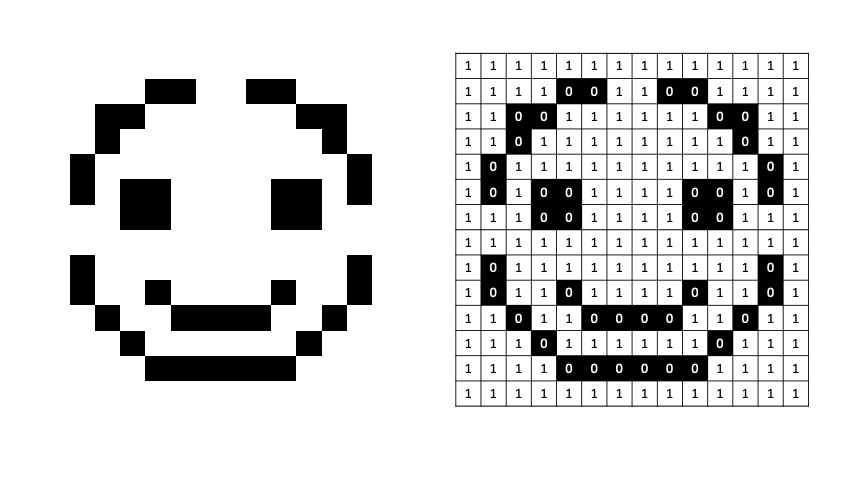
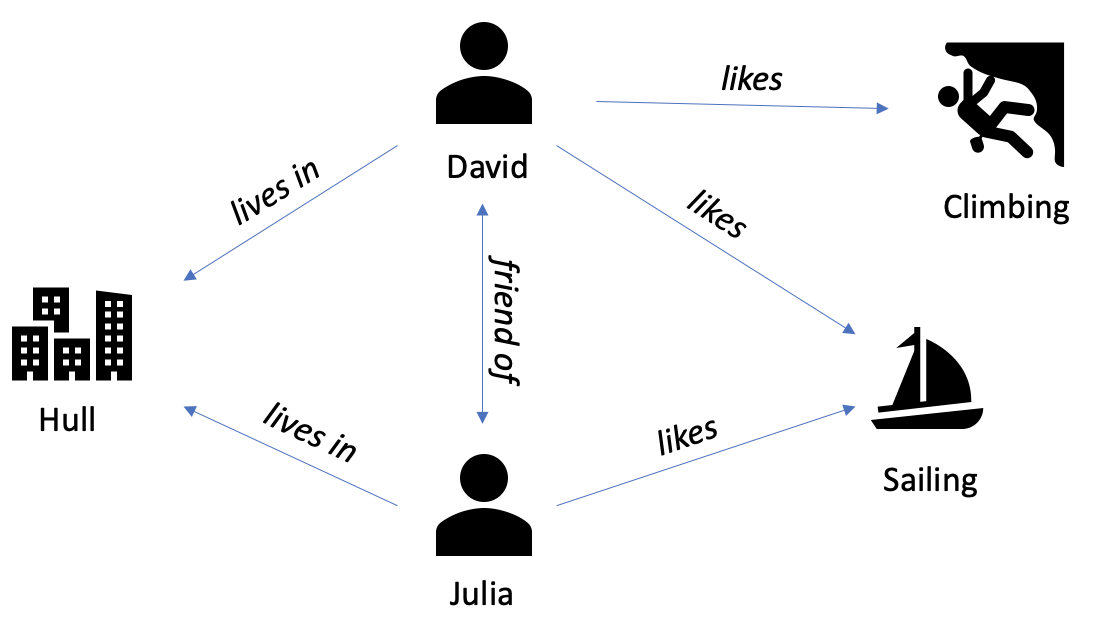
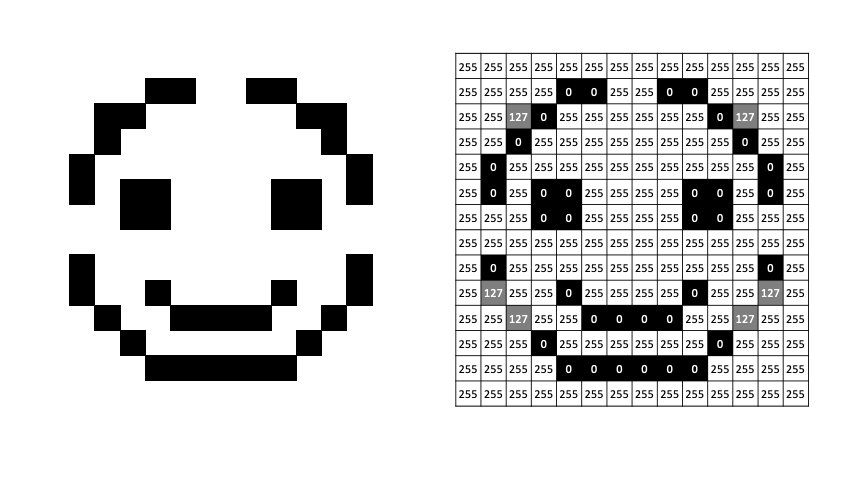

In [7]:
import pandas as pd

df = pd.read_csv("data/urban_population.csv")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1980,2000,2020,Unnamed: 8
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.472000,46.717000,43.697000,NaN
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.704688,20.845000,28.669286,36.783306,NaN
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401000,15.995000,22.078000,26.026000,NaN
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.670329,24.518577,35.352981,47.848625,NaN
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,10.435000,24.298000,50.087000,66.825000,NaN


Each row in the data corresponds to a country, with columns for the
country’s name, the urban population in 1960, 1980, 2000 and 2020, and
some other metadata.

The `.info()` method of a DataFrame gives us a useful summary of the
columns it contains:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            263 non-null    float64
 5   1980            263 non-null    float64
 6   2000            263 non-null    float64
 7   2020            262 non-null    float64
 8   Unnamed: 8      0 non-null      float64
dtypes: float64(5), object(4)
memory usage: 18.8+ KB



Each column in a Pandas DataFrame has a single type. The urban
population percentages in columns 1960, 1980, 2000 and 2020 all contain
floating point numbers (`float64`), for example. When columns contain a
mixture of data types or strings, Pandas will give the whole column the
generic `object` type. Sometimes quirks in the data may cause Pandas to
infer a different type to what you expect - we will revisit this in
[Section 2.2.1](2-02-01-DataConsistency).

We can also see that some columns have missing values (the data has 266
rows, but some columns have fewer than 266 "`non-null`" values), and
have a strange additional column `Unnamed: 8` that has *only* missing
(null) values. This is another topic we’ll revisit later.

### Customising pandas.read_csv

The original file from the World Bank contains a few lines of metadata
at the top:


In [9]:

!head data/urban_population_header.csv


"Data Source","World Development Indicators",

"Last Updated Date","2021-06-30",
Country Name,Country Code,Indicator Name,Indicator Code,1960,1980,2000,2020,
Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.472,46.717,43.697,
Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.7046880270389,20.8449997980123,28.6692864525936,36.7833061490919,
Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401,15.995,22.078,26.026,
Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.6703287907718,24.5185774336299,35.3529813285238,47.8486254352506,
Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,10.435,24.298,50.087,66.825,
Albania,ALB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,30.705,33.762,41.741,62.112,



The column names start on line 4 of the file, and the previous lines
give metadata on where the file came from and when it was updated.

Using `read_csv` on this file (with default arguments) gives an error:


In [10]:
from lib2to3.pgen2.parse import ParseError
import traceback # library used to print error without breaking python

try:
    df = pd.read_csv("data/urban_population_header.csv")
except Exception as e: 
    traceback.print_exc()


Traceback (most recent call last):
  File "/var/folders/f4/m42_v8vj1fjc0wrwtb69xjt80000gr/T/ipykernel_20322/1010206246.py", line 5, in <cell line: 4>
    df = pd.read_csv("data/urban_population_header.csv")
  File "/usr/local/Caskroom/miniforge/base/envs/playground/lib/python3.10/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/Caskroom/miniforge/base/envs/playground/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 586, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/Caskroom/miniforge/base/envs/playground/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 488, in _read
    return parser.read(nrows)
  File "/usr/local/Caskroom/miniforge/base/envs/playground/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 1047, in read
    index, columns, col_dict = self._engine.read(nrows)
  File "/usr/local/Caskroom/miniforge/base/envs/playground/lib/python3.10/si

This is because pandas is trying to use the first line in the file to define the columns present in our data. To avoid this, we can use the `skiprows` argument to tell pandas our table starts on line 4 (skipping the first 3 lines):


In [11]:
df = pd.read_csv("data/urban_population_header.csv", skiprows=3)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1980,2000,2020,Unnamed: 8
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.472000,46.717000,43.697000,NaN
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.704688,20.845000,28.669286,36.783306,NaN
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401000,15.995000,22.078000,26.026000,NaN
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.670329,24.518577,35.352981,47.848625,NaN
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,10.435000,24.298000,50.087000,66.825000,NaN



There’s not a single CSV data "standard" that everyone follows, so it’s
common to need to tweak things to load properly. Other examples include:

-   Different "delimeters", e.g., Tab-separated values files (TSVs) with
    tabs separating column values instead of commas.
-   Footers: Lines with metadata/other information not part of the table
    at the end of the file.
-   Comments: Annotations anywhere in the file that shouldn’t be
    included in the table.

`pd.read_csv` can be customised to deal with all of these and more, for
example:

``` python
df = pd.read_csv(
   "myfile.csv",
   delimeter="\t",  # columns separated by tabs
   skipfooter=3,    # exclude last 3 lines
   comment="#",     # exclude lines starting with "#"
)
```

### Exercise
Later on we'll be using the "Palmer Penguins" dataset, which we have saved at the path `data/penguins.csv`. Load this dataset into a pandas data frame. What type of data do you think it contains? What are the types of the columns and do they match what you'd expect? 

Solution 
`df = pd.read_csv("data/penguins.csv")` to load the data into pandas. We'll discuss the answer to the other questions later, but you may have noticed that some of the columns have the generic `object` type even though it looks like they contain numeric data.

### Excel Spreadsheets

As CSV files are a plaintext (human readable) format and don’t need
proprietry software to use and create they are always preferable to
Excel spreadsheets for raw data, if available. However, it is still
common to find data in Excel `.xls` or `.xlsx` files.

If needed, Pandas also has a function
[`pandas.read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
to load data from Excel spreadsheets. The format is very similar to
`read_csv`:

``` python
df = pd.read_excel(
   "my_spreadsheet.xlsx",
   sheet_name="Sheet1"
)
```

Note you must specify which worksheet you want to load as a data frame.
If you want to load tables from multiple worksheets you would need to
load them into multiple data frames.

## Databases

We can think of databases as containers for data. Typically, databases
allow for easy storage, retrieval, update, and analysis of data.

In the case of tabular data, a database may have many tables. A database
can be flat, or it can be relational.

Example:

**Flat Database with single table:**

| Subject | Teacher | Teacher Email | Teacher Phone Number | Day of Week | Time Start | Time End |
|---------|--------|------------|-----------------|-----------|----------|--------|
| Maths   | Mr F    | f@school.com  | 07123123123          | Monday      | 1000       | 1200     |
| English | Ms P    | p@school.com  | 07456456456          | Tuesday     | 1100       | 1300     |
| Physics | Mrs A   | a@school.com  | 07789789789          | Thursday    | 1400       | 1600     |
| French  | Mr F    | f@school.co   | 07123123123          | Friday      | 1000       | 1300     |

**Relational database with two tables:**

| Subject | Teacher | Day of Week | Time Start | Tie End |
|---------|---------|-------------|------------|---------|
| Maths   | Mr F    | Monday      | 1000       | 1200    |
| English | Ms P    | Tuesday     | 1100       | 1300    |
| Physics | Mrs A   | Thursday    | 1400       | 1600    |
| French  | Mr F    | Friday      | 1000       | 1300    |

| Teacher | Teacher Email | Teacher Phone Number |
|---------|---------------|----------------------|
| Mr F    | f@school.com  | 07123123123          |
| Ms P    | p@school.com  | 07456456456          |
| Mrs A   | a@school.com  | 07789789789          |

Flat databases can be simple but also inefficient. Relational databases,
with data stored in a series of interconnected tables, can be more
complicated but more computationally efficient.

### SQL Databases & RDBMS

Structured Query Lanage (SQL) is a standard language for storing,
manipulating and retrieving data in databases.

An RDBMS (Relational Database Management System) is the basis for SQL
and relies on the [relational data
model](https://en.wikipedia.org/wiki/Relational_model). Many modern and
popular databases implement the ideas of an RDBMS. Some common
implementations are:

-   PostgreSQL
-   SQLite
-   MySQL
-   Oracle
-   MS Access

We use SQL to interact with these databases. You can find some basic,
interactive, tutorials at [W3Schools](https://www.w3schools.com/sql/).

### NoSQL Databases

> NoSQL databases (aka "not only SQL") are non tabular, and store data
> differently than relational tables. NoSQL databases come in a variety
> of types based on their data model. The main types are document,
> key-value, wide-column, and graph. They provide flexible schemas and
> scale easily with large amounts of data and high user loads.
> *https://www.mongodb.com/nosql-explained*

Some common NoSQL Databases include:

-   Elasticsearch (document)
-   MongoDB (document)
-   DynamoDB (key-value)
-   Gaffer (graph)

**Document example**

``` json
{
    "name": "Jane",
    "dob": "2012-04-23T18:25:43.511Z",
    "interests": ["running", "swimming"],
    "counter": 104
}
```

**Key-Value example:**

![key-value
example](https://upload.wikimedia.org/wikipedia/commons/5/5b/KeyValue.PNG)

**Graph example:** ![graphexample](../../figures/m2/graph_data.png)

Unfortunately, different types of databases will often have their own,
unique, query languages, beyond SQL - more to learn!

### Where Is the Data?

Databases can exist on your local machine or can be hosted elsewhere.
Typically, we’ll want to host a database somewhere that everyone who
needs access can reach.

Many cloud providers offer database solutions with easy-to-use
interfaces, allowing us (for a cost!) to worry less about exactly how
the DBMS is working and focus, instead, on the data itself.

### Which Database to Use

Which type of database you choose should be driven by your data and how
you plan to use it. You may find that your data can be expressed in more
than one of the forms above or as a table. You then need to weigh up
different factors to decide which form and which database, if any, to
use.

Some factors you may consider (unordered!):

-   Ease of use
-   Cost
-   Footprint on disk
-   Footprint in memory
-   Retrieval/update speed

Many blogs and articles have been written on the choice of database, for
example [this xplenty
article](https://www.xplenty.com/blog/which-database/).

## Application Programming Interfaces (APIs)

Application programming interfaces (APIs) are services that allow you to
programmatically request information, including datasets, from a remote
server. Large, digitally mature organisations commonly have APIs
available to access their data, including
[GitHub](https://docs.github.com/en/rest/guides/getting-started-with-the-rest-api),
[Twitter](https://developer.twitter.com/en/docs/twitter-api) and the
[Office for National Statistics](https://developer.ons.gov.uk/), for
example. Advantages of APIs include:

-   It’s possible to make queries to request a tailored subset of a
    dataset, so you only get what you’re interested in.
-   It’s straightforward to automate making many similar queries (i.e.,
    to request many different datasets) with different parameters.
-   If a dataset is updating regularly (maybe you want to know the
    current weather at a location, for example) they provide a robust
    way to get the latest status of what you’re interested in.
-   They usually should provide a reproducible way for others to
    download the same data you’re using.

Most APIs follow the REST style, which we briefly introduce here, but
you may also come across GraphQL APIs. [This
blog](https://www.smashingmagazine.com/2018/01/understanding-using-rest-api/)
has an overview of both types.

### Datamuse API

As an example, we’ll try the Datamuse API, which can be used to find
relationships between words and terms (similar words, words that rhyme
and so on). You can find documentation for it here:
https://www.datamuse.com/api/

An API query has four main components: a base URL, an endpoint,
parameters, and headers:

**Base URL:** The address of the server hosting the data we want to
access - all our API queries will start with this. For the Datamuse API
it’s: `https://api.datamuse.com`

**Endpoint:** Each API might have multiple types of data we can query,
known as different "endpoints". The path to the endpoint is added to the
base URL. The Datamuse API has two endpoints:`/words` for searching for
relationships (of different types) between words, and `/sug`, which can
be used for auto-completion/spelling correction.

**Parameters:** Define what data subset we’re interested in and are
provided in the format `name=value`. These are added to the query after
a `?` following the endpoint. To specify multiple parameters, separate
each parameter name and value pair with an `&`. The available parameters
should be listed in the API’s documentation
([here](https://www.datamuse.com/api/) for Datamuse).

The parameter string `?rel_jjb=dog&max=5` defines two parameters and
values: - `rel_jjb=dog`: Find adjectives commonly used to describe the
noun "dog". - `max=5`: Return 5 results.

**Headers:** Provide additional context/metadata about your request, the
most common being authentication information. Authentication may be used
to only give you access to resources you have permission to see, limit
the number of requests you can make within a certain amount of time, or
for billing purposes (if the API isn’t free).

The Datamuse API doesn’t require authentication, so we don’t need to add
any headers here. If the API you’re using requires it they should
provide documentation that describes what you need to do - [here is an
example from
GitHub](https://docs.github.com/en/rest/guides/getting-started-with-the-rest-api#authentication),
and [here is how to add headers in the Python requests
library](https://docs.python-requests.org/en/master/user/quickstart/#custom-headers).

**Full query:** Adding together all the components we have the full API
query: - https://api.datamuse.com/words?rel_jjb=dog&max=5

You can open this in a web browser and should see something like this:

``` json
[
    {"word": "little", "score": 1001},
    {"word": "old", "score": 1000},
    {"word": "hot", "score": 999},
    {"word": "big", "score": 998},
    {"word": "black", "score": 997}
]
```

We get the top 5 words describing "dog" and a score that indicates how
strong the association is.

The most common format for data returned by an API is JSON (JavaScript
Object Notation) from the JavaScript language, which is commonly used in
web development. JSONs have a similar structure to Python dictionaries
or lists of Python dictionaries. Python has a built-in library `json`
for converting data to and from the JSON format (see
[here](https://docs.python.org/3/library/json.html)), and Pandas also
has a function for creating a DataFrame from a JSON file
([pandas.read_json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html)).

We can make the same API query in Python using the
[requests](https://docs.python-requests.org/en/master/user/quickstart/)
library, as follows:


In [12]:

import requests

url = "https://api.datamuse.com/words" 
params = {"rel_jjb": "dog","max": 5} 
r = requests.get(url, params=params)


Note that we can define the parameters in a dictionary, which is much easier to read than the raw format in the query string seen earlier. To check whether the request worked you can check the status code:

In [13]:
print(r.status_code)

200



Codes in the 200s usually indicate a successful query, for the meanings
of other codes see
[here](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status), or
`print(r.content)` may give you more information about what happened.

We can convert the result into a list of dictionaries as follows:


In [14]:
result_list = r.json() 
print(result_list)


[{'word': 'little', 'score': 1001}, {'word': 'old', 'score': 1000}, {'word': 'hot', 'score': 999}, {'word': 'big', 'score': 998}, {'word': 'black', 'score': 997}]



And we can interact with that list in the usual Python way:


In [15]:

print(result_list[0]["word"])


little



You can also load an API query directly into a Pandas DataFrame:


In [16]:
import pandas as pd

df = pd.read_json("https://api.datamuse.com/words?rel_jjb=dog&max=5") 
df

,word,score
0,little,1001
1,old,1000
2,hot,999
3,big,998
4,black,997




    But this may not work well if your query returns a more complex data structure - in that case it's best to start with the requests library.

    Bear in mind it's likely the service you're using will limit both the rate of queries you can make, and the amount of data returned per query. If you want more data than can be returned by one query, an API will usually provide a way to get the data with multiple queries - this is known as "pagination" (see [this blog post](https://nordicapis.com/everything-you-need-to-know-about-api-pagination/) for example). If you're making many queries you may need to limit their rate in your script to avoid breaching the usage rules of the API - a quick way to do that would be to use the [time.sleep](https://realpython.com/python-sleep/#adding-a-python-sleep-call-with-timesleep) function in Python.

    This "public-apis" repository on GitHub maintains a list of open APIs that should be good for learning purposes: https://github.com/public-apis/public-apis. The UK government also maintains a list of APIs providing data on many different areas of government & life in the UK: https://www.api.gov.uk/

### Exercise
    Use the Datamuse API to find 3 words that rhyme with "cat" and load them into a Pandas data frame. You'll need to use the Datamuse documnetation to find which parameter will search for rhyming words.

Solution: The relevant parameter is `rel_rhy`, and the query and pandas function needed is `pd.read_json("https://api.datamuse.com/words?rel_rhy=cat&max=3")`

## Image Data

Images are commonly represented as a n-dimensional tensor of pixel
values.

### Black and White

A simple form of this can be shown with a black and white image. The
13x13 pixel smiley can be represented by a 2D tensor (width,height) of
0s and 1s. Black and white images can be thought of as a binary off/on
for each pixel.

![black_and_white_smiley](../../figures/m2/black_and_white_smiley.png)

### Grayscale

If we want to move to grayscale - allowing shades of gray between black
and white - we can do this with intermediate values between black and
white. Here we change black and white to 0 and 255 (8-bit
representation), shades of gray are everything in between.

![grayscale_smiley](../../figures/m2/grayscale_smiley.png)

### RGB

We can introduce colour using an RGB (Red Green Blue) representation.
Here, we store the red, green, and blue values separately - these
individual representations are known as channels. We now use a 3D tensor
to represent this image (width,height,channels).

% hosted on imgur for size
![rgb_smiley](https://i.imgur.com/Z0Z52Ph.gif)

### Libraries

Some popular libraries for processing and analysing image data in Python
include:

-   [opencv-python](https://pypi.org/project/opencv-python/):
    [OpenCV](https://opencv.org/) (Open-source Computer Vision) packages
    for Python. Contains hundreds of computer vision algorithms.
-   [Pillow](https://pillow.readthedocs.io/en/stable/): PIL (Python
    Imaging Library) fork. "This library provides extensive file format
    support, an efficient internal representation, and fairly powerful
    image processing capabilities".
-   [torchvision](https://pytorch.org/vision/stable/index.html): Part of
    the wider [PyTorch](http://pytorch.org/) project. "The torchvision
    package consists of popular datasets, model architectures, and
    common image transformations for computer vision".
-   [tf.keras.preprocessing](https://www.tensorflow.org/tutorials/load_data/images#load_using_tfkeraspreprocessing):
    Part of the wider tensorflow/keras ecosystem, the preprocessing
    module provides preprocessing utilities for image data.

## Text Data

Text data is common in data science applications, anything from
analysing Tweets and social media to documents and novels. We’ll cover
some general techniques for handling text data in this module, but we
won’t delve into the details of the wider field of "Natural Language
Processing" (NLP). Some popular libraries and resources for processing
and analysing text data in Python include:

-   [NLTK](https://www.nltk.org/): Well-established natural language
    processing toolkit for Python, offering a wide range of text
    processing techniques in many different languages.
-   [Spacy](https://spacy.io/): A more modern alternative to NLTK,
    offering higher performance, state of the art algorithms, and better
    integration with modelling frameworks in some cases.
-   [Scikit-Learn](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html):
    Has common NLP preprocessing functions which can be integrated with
    modelling pipelines using many different machine learning
    algorithms.
-   [Hugging Face](https://huggingface.co/): For implementations of
    state-of-the-art deep learning models from research.
-   [Textract](https://textract.readthedocs.io/en/stable/): Text data
    may appear in many file formats other than plaintext files (`.txt`
    or similar), such as in PDFs, word documents, or even within images.
    Textract provides a single interface for extracting text data from
    many different formats.

## Other

-   Audio: commonly stored as `.wav` or `.mp3` and displayed as a
    [waveform](https://en.wikipedia.org/wiki/Waveform) - digitised audio
    can be used for things like training speech recognition models. Lots
    of crossover with signal processing!
    [Librosa](https://librosa.org/doc/latest/index.html) is a popular
    python package for working with audio.
-   Video: can be thought of as many images + audio!
-   Geospatial: data relating to any location on the Earth’s surface.
    The [geopandas](https://geopandas.org/) library combines the
    capabilities of [shapely](https://shapely.readthedocs.io/) and
    Pandas to make working with this datatype easier.
-   Time Series: Data that can be expressed as observations over time,
    e.g., stock price data. Honourable mention to
    [sktime](https://github.com/alan-turing-institute/sktime) for
    analysis.
-   XML (Extensible Markup Language): We recommend using a library such
    as
    [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
    to help parse this heavily structured format.
-   Web scraping: extracting structured data from web sites.
    [Scrapy](https://scrapy.org/) is a popular library here.